In [ ]:
#The Sens mean uses special packages in this operation
#Without running this, the code would not work because
#The package was installed in a python environment from R

%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("lmomco")
library("lmomco")
fake.dat <-c(123, 34, 4, 654, 37, 78)
df0 <- read.csv(file = 'Book1diseased.csv')
df1 <- read.csv(file = 'Book1notdiseased.csv')

sen1 <- sen.mean(df0[7]);
sen2 <- sen.mean(df0[5]);

#   list1 <- append(list1, sen)
x <- c(sen1,sen2)

print(x)



$sen
[1] 26.0831

$source
[1] "sen.mean"

$sen
[1] 25.0013

$source
[1] "sen.mean"



In [ ]:
x = [26.0831,25.0013 ]
26.0831 - 25.0013 

1.0818000000000012

In [ ]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from statsmodels.robust.scale import huber
import array as arr
from scipy.stats import cauchy
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from scipy.stats import wilcoxon
from scipy import stats
from scipy.stats.mstats import winsorize

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
rdiseased = cauchy.rvs(loc = x[0], scale =1, size=100)
rdiseased

In [ ]:
rnotdiseased = cauchy.rvs(loc = x[1], scale =1, size=100)
rnotdiseased

In [ ]:
def plot_roc(y_test,probs):
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Senn.csv')
data

In [ ]:
X = data[['Senn1', 'Senn2']]
y = data['Outcome']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

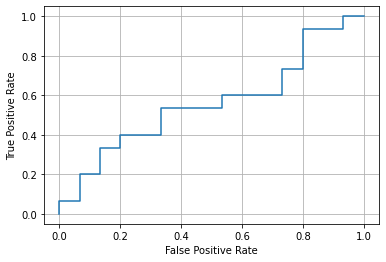

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

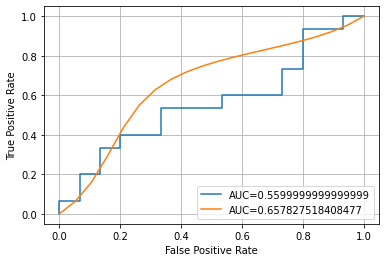

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

const = 1.0818000000000012;
t = np.linspace(0,1,20)
x = np.pi*t - np.pi/2
y = const + np.tan(x)
z = 1/2 + 1/np.pi*np.arctan(y)
auc2 = np.trapz(z,t)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.plot(tpr, np.tan(tpr))
plt.plot(t,z,label="AUC="+str(auc2))
plt.legend(loc=4)
plt.grid()
plt.show()